In [ ]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
os.path.join('data','happy')

'data/happy'

In [ ]:
os.listdir('data')

['.ipynb_checkpoints', 'sad', 'happy']

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# Avoid OOM erros by setting GPU Memory Consumption Growth
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

## **1.2 Remove dodgy images**

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))[:20]

['1_617fd1e2590c2.jpg',
 'images5.jpg',
 'happy-woman-headphones-pink-african-american-1296x728-header.jpg',
 'dv2051009.jpg',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.jpg',
 'image17.jpeg',
 '343515-worldhappinessreport1440.jpg',
 'A_Sep20_14_1189155141.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'getty_494581822_130796.jpg',
 'happy-people-jumping-white_165429-331.jpg',
 'image20.jpeg',
 'image18.jpeg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 'image16.jpeg',
 '1000_F_176864699_2rY3V6rmOJ2EexazQGd1NnOnCherr6Sk.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'people-rejoice-victory-working-team-people-celebrate-vector-illustration_3482-8534.jpg',
 '35438_hd.jpg',
 'image9.jpeg']

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

.ipynb_checkpoints
sad
happy


In [ ]:
img = cv2.imread(os.path.join('data','happy','05-12-21-happy-people.jpg')) # reading the image as a numpy array

In [ ]:
img.shape # 3 channels for colored image

(880, 1400, 3)

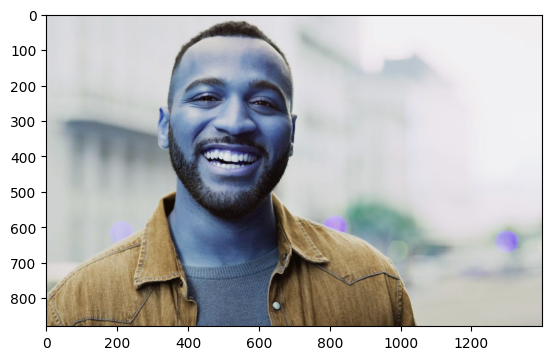

In [ ]:
plt.imshow(img)

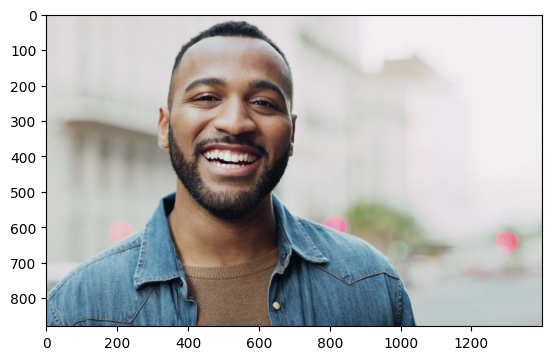

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir,image_class,image)
    try:
      img = cv2.imread(image_path) # opens an image using OpenCV
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))

Image not in ext list data/sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list data/sad/very-sad-man-sitting-alone-on-white-background-depressed-young-man-sitting-businessman-vector.jpg
Image not in ext list data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in ext list data/sad/vector2.svg
Image not in ext list data/sad/vector6.svg
Image not in ext list data/sad/vector3.svg
Image not in ext list data/sad/depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext list data/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/portrait-sad-man-260nw-126009806.jpg
Image not in ext list data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list data/sad/vector11.svg
Image not in ext list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Ima

## **1.3 Load Data**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128))

In [ ]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data') # batches, resizes, shuffles images

Found 235 files belonging to 2 classes.


In [ ]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
# Images represented as numpy arrays
batch[0].shape # batch size of 32, with 256*256 image size

(32, 256, 256, 3)

In [ ]:
batch[0][:1]

array([[[[171.      , 213.      , 237.      ],
         [171.      , 213.      , 237.      ],
         [171.      , 213.      , 237.      ],
         ...,
         [162.      , 209.      , 239.      ],
         [162.      , 209.      , 239.      ],
         [162.      , 209.      , 239.      ]],

        [[171.      , 213.      , 237.      ],
         [171.      , 213.      , 237.      ],
         [171.      , 213.      , 237.      ],
         ...,
         [162.08594 , 209.08594 , 239.08594 ],
         [162.08594 , 209.08594 , 239.08594 ],
         [162.08594 , 209.08594 , 239.08594 ]],

        [[171.      , 213.      , 237.      ],
         [171.      , 213.      , 237.      ],
         [171.      , 213.      , 237.      ],
         ...,
         [162.47656 , 209.47656 , 239.47656 ],
         [162.47656 , 209.47656 , 239.47656 ],
         [162.47656 , 209.47656 , 239.47656 ]],

        ...,

        [[122.14844 ,  92.14844 ,  40.148438],
         [122.074585,  92.074585,  40.24646 ]

In [ ]:
batch[1] # Class 0 = happy people, Class 1 = sad people

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int32)

In [ ]:
type (batch)

tuple

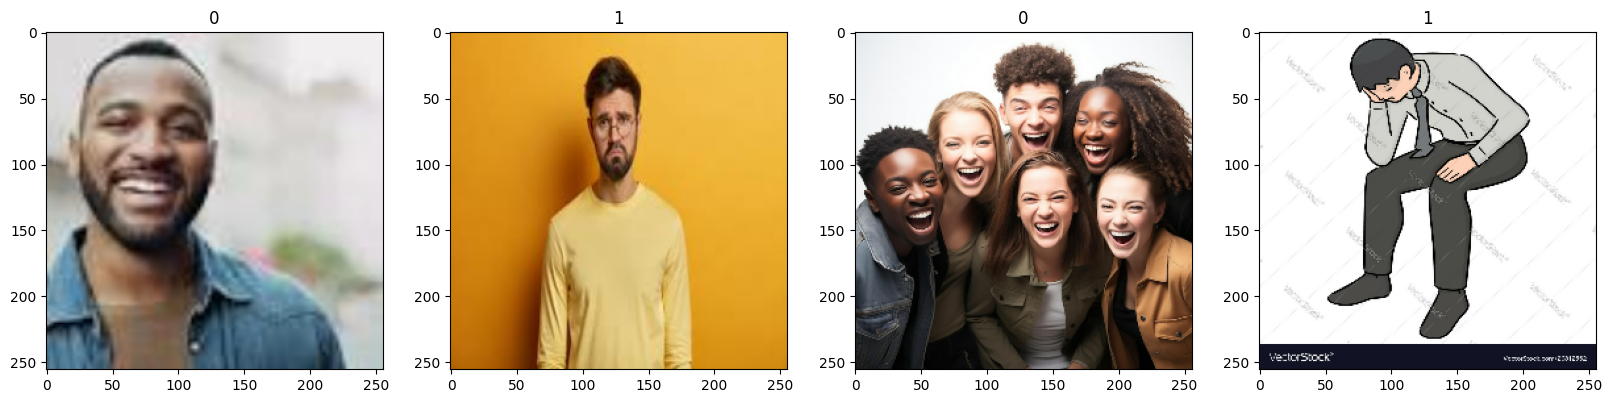

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
batch[0].min(), batch[0].max()

(0.0, 255.0)

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.min(), scaled.max()

(0.0, 1.0)

# **2. Preprocess Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y)) # while loading in batches we perform the scaling

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

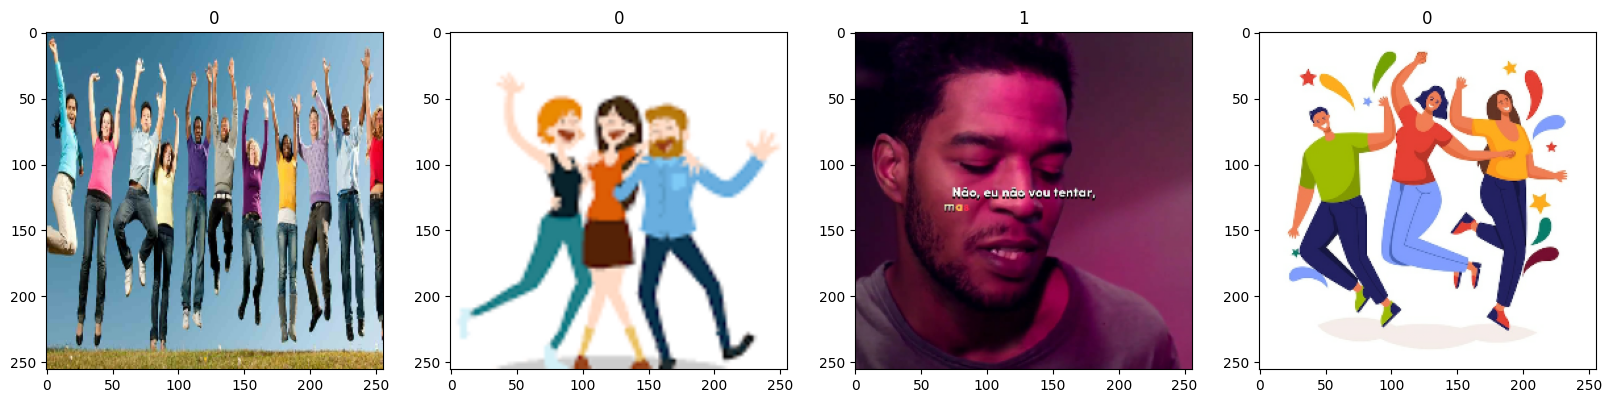

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

## **Split Data**

In [ ]:
len(data) # number of batches

8

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train_size, val_size, test_size

(5, 2, 1)

In [ ]:
train_size + val_size + test_size

8

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train), len(val), len(test)

(5, 2, 1)

# **3. Deep Model**

## **3.1 Build Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # 16 filters, 3 pixels by 3 pixels size filter
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## **3.2 Train**

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 8s 732ms/step - loss: 3.1824 - accuracy: 0.5188 - val_loss: 2.3464 - val_accuracy: 0.5312
Epoch 2/20
5/5 [==============================] - 7s 1s/step - loss: 1.2868 - accuracy: 0.4625 - val_loss: 0.6916 - val_accuracy: 0.5469
Epoch 3/20
5/5 [==============================] - 10s 1s/step - loss: 0.6950 - accuracy: 0.5312 - val_loss: 0.6801 - val_accuracy: 0.5781
Epoch 4/20
5/5 [==============================] - 9s 1s/step - loss: 0.6611 - accuracy: 0.6125 - val_loss: 0.6120 - val_accuracy: 0.7812
Epoch 5/20
5/5 [==============================] - 5s 697ms/step - loss: 0.5965 - accuracy: 0.8062 - val_loss: 0.4432 - val_accuracy: 0.8750
Epoch 6/20
5/5 [==============================] - 5s 693ms/step - loss: 0.4639 - accuracy: 0.8188 - val_loss: 0.3509 - val_accuracy: 0.8594
Epoch 7/20
5/5 [==============================] - 7s 957ms/step - loss: 0.4869 - accuracy: 0.7625 - val_loss: 0.4810 - val_accuracy: 0.7969
Epoch 8/20
5/5 [============

In [ ]:
hist.history

{'loss': [3.182426929473877,
  1.2868402004241943,
  0.6949557662010193,
  0.6610504388809204,
  0.5965356826782227,
  0.4638593792915344,
  0.48686084151268005,
  0.37440937757492065,
  0.29796838760375977,
  0.23578421771526337,
  0.15204134583473206,
  0.12770585715770721,
  0.0890607237815857,
  0.05142949894070625,
  0.05458758398890495,
  0.03315650671720505,
  0.03572428971529007,
  0.029712021350860596,
  0.019615652039647102,
  0.013235698454082012],
 'accuracy': [0.518750011920929,
  0.4625000059604645,
  0.53125,
  0.612500011920929,
  0.8062499761581421,
  0.8187500238418579,
  0.762499988079071,
  0.8999999761581421,
  0.9375,
  0.9125000238418579,
  0.9312499761581421,
  0.9750000238418579,
  0.96875,
  0.9937499761581421,
  0.981249988079071,
  0.987500011920929,
  0.987500011920929,
  0.9937499761581421,
  0.9937499761581421,
  0.987500011920929],
 'val_loss': [2.346440553665161,
  0.6915960311889648,
  0.6801450252532959,
  0.6120152473449707,
  0.4431963562965393,
  0

## **3.3 Plot Performance**

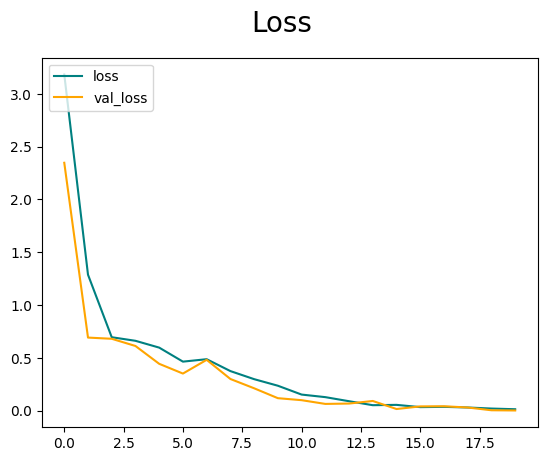

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

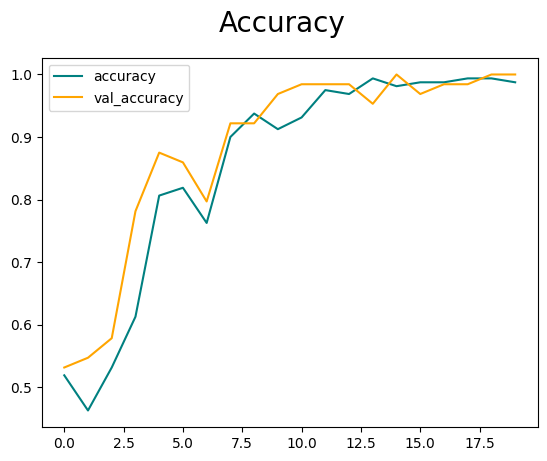

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **4. Evaluate Performance**

## **4.1 Evaluate**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

1

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# **10. Test**

In [ ]:
import cv2

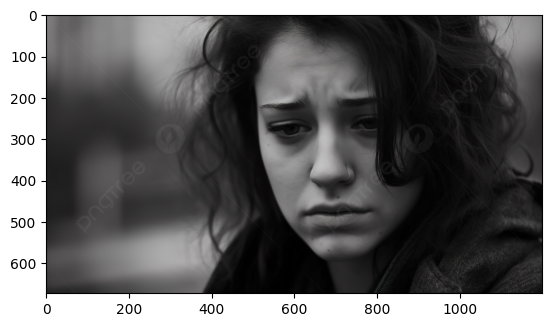

In [ ]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

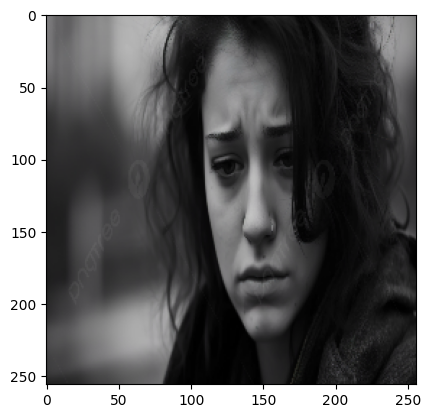

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

array([[0.99986434]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# **11. Save the Model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('models/imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.9944766]], dtype=float32)